In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
from sympy.plotting import plot
import ipywidgets as widgets

In [3]:
%%html
<style> table {display: block} </style>

## Question 1

To calculate $\sqrt{x}$ with $x>0$, the followiing iteration with cubic convergence is suggested:

$x_{n+1} = Ax_{n} + \frac{B}{x_n} + \frac{C}{x_n^3} = T(x_n)$   $n = 0, 1, 2, ...$

##### NOTE: In the original question, $\varphi(x_n)$ is used but here it is $T(x_n)$.

a) Calculate suitable coefficients A, B, C as show that the method converges to $\sqrt{x}$ for $x_0 \ge \sqrt{x}$

b) Compare this algorithm with the Newton method on the example of the calculation of $\sqrt{2}$ as solution of $f(x) = x^2 - 2 = 0$.

use as starting values $x_0 = 2$ and $x_0 = 1$ and as stopping criterion the relative error of the residual norm dropping below $10^{-6}$.

### Solution

#### a)


#### Fixed point: 
A fixed point under a transformation is any point which maps to itself. Consider a transformation $T: X\rightarrow X$ ($T$ maps $X$ onto itself $\rightarrow$ self-mapping) and $x^*\in X$. If $T(x^*) = x^*$, then $x^*$ is a fixed point of the transformation. For fixed point iteration $x_{k+1} = T(x_k)$ the order of convergence is $p$ if $T'(x^*)=0, T''(x^*), \cdots, T^{(p-1)}(x^*) = 0, T^{(p)} \ne 0.$

Hence, for cubic convergence we have:

$T(x^*) =  x^* \rightarrow T(x^*) = Ax^* + \frac{B}{x^*} + \frac{C}{x{*3} = x^* \rightarrow T(\sqrt{\alpha}}) = A\sqrt{\alpha} + \frac{B}{\alpha} + \frac{C}{\sqrt{\alpha}^3} = \sqrt{\alpha}$

$T'(x^*)=0 \rightarrow T'(x^*) = A - \frac{B}{x^{*2}} - \frac{3C}{x^{4}} = 0 \rightarrow T'(\sqrt{\alpha})=A-\frac{B}{\alpha}-\frac{3}{\alpha^{2}} = 0$

$T''(x^*)=0 \rightarrow T''(x^*) = \frac{2B}{x^{*3}} + \frac{12C}{x^{*5}} = 0 \rightarrow T''(\sqrt{\alpha}) = \frac{2B}{\sqrt{\alpha}^{*3}} + \frac{12C}{\sqrt{\alpha}^{5}} = 0 \xrightarrow{\times \sqrt{\alpha}} T''(\sqrt{\alpha}) = \frac{2B}{\sqrt{\alpha}} + \frac{12C}{\alpha^{2}} = 0$


$\begin{equation*}
\begin{pmatrix}
1 & 1 & 1 \\
1 & -1 & -3 \\
0 & 2 & 12
\end{pmatrix}
\begin{pmatrix}
A \\
\frac{B}{\alpha} \\
\frac{C}{\alpha^2}
\end{pmatrix} = 
\begin{pmatrix}
1\\
0\\
0
\end{pmatrix} \rightarrow 
\begin{pmatrix}
1 & 1 & 1 \\
0 & -2 & -4 \\
0 & 0 & 8
\end{pmatrix}
\begin{pmatrix}
A \\
\frac{B}{\alpha} \\
\frac{C}{\alpha^2}
\end{pmatrix} = 
\begin{pmatrix}
1\\
-1\\
-1
\end{pmatrix}
\end{equation*}$

$\rightarrow C=\frac{\alpha^2}{8}, B = \frac{3\alpha}{4}, A = \frac{3}{8}$

$\rightarrow T(x_n) = \frac{3}{8}x_{n} + \frac{3\alpha}{4x_n} - \frac{\alpha^2}{8x_n^3} = x_{n+1}$

Now we find an interval and check the contraction and self-mapping condition $\left[\sqrt{\alpha}, c\sqrt{\alpha}\right], c>1$

$T'(x_n) = \frac{3}{8} - \frac{3\alpha}{4x_n^2} + \frac{3\alpha^2}{8x_n^4} = \left(\sqrt{\frac{3}{8}} - \sqrt{\frac{3}{8}} \frac{\alpha}{x_n^2}\right)^2$

$\rightarrow |T'(x_n)|_{x_n=\sqrt{\alpha}} = \left(\sqrt{\frac{3}{8}} - \sqrt{\frac{3}{8}} \frac{\alpha}{{\sqrt{\alpha}}^2}\right)^2 = 0$

$\rightarrow |T'(x_n)|_{x_n\rightarrow \infty} = \left(\sqrt{\frac{3}{8}} - \sqrt{\frac{3}{8}} \frac{\alpha}{\infty^2}\right)^2 = \frac{3}{8}$ [$x_n$ is taken to infinity because $c$ is allowed to go to infinity].

For $x_n = c\sqrt{\alpha}$, we have $T'(c\sqrt{\alpha}) = \frac{3}{8} - \frac{3}{4}\frac{\alpha^2}{c^2\alpha} + \frac{3}{8}\frac{\alpha^2}{c^4\alpha^2} = \frac{3}{8}-\frac{3}{4c^2}+\frac{3}{8c^4} = \frac{3c^4-6c^2+3}{8c^4}=\frac{3(c^2-1)^2}{8c^4}$

$\rightarrow 0 \le T'(c\sqrt{\alpha}) = \frac{3(c^2-1)^2}{8c^4} < 1 \rightarrow$ Contraction condition is fulfilled for any $c\ge 1$ (function is monotonically increasing (only either increasing or staying constant) for $c\ge1$). See function below.

<IPython.core.display.Javascript object>


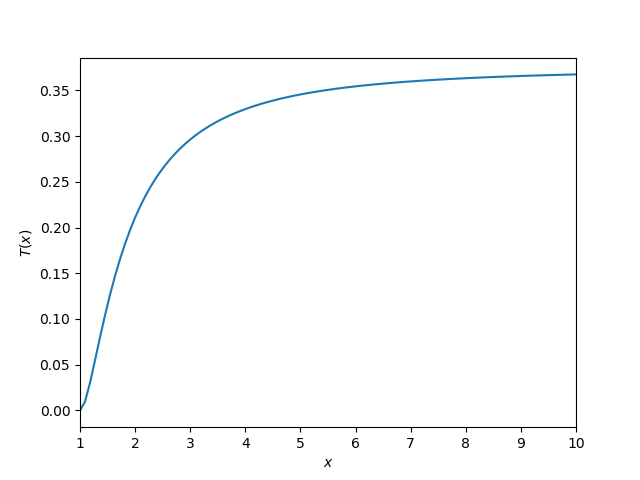

In [41]:
x = np.linspace(1, 10, 100)
Tx = [3*(c**2-1)**2/(8*c**4) for c in x]

plt.plot(x, Tx)
plt.xlim(1, 10)
plt.xlabel("$x$")
plt.ylabel("$T(x)$")
plt.show()

Now if $x\in [a, b] \rightarrow T(x) \in [a, b]$

$x=\sqrt{\alpha} \rightarrow T(\sqrt{\alpha}) = \frac{3}{8}\sqrt{\alpha} + \frac{3}{4} \frac{\alpha}{\sqrt{\alpha}} - \frac{\alpha^2}{8\sqrt{\alpha}^3} = \sqrt{\alpha}$

$x=c\sqrt{\alpha} \rightarrow T(c\sqrt{\alpha}) = \frac{3}{8}c\sqrt{\alpha} + \frac{3}{4} \frac{\alpha}{c\sqrt{\alpha}} - \frac{\alpha^2}{8c^3\sqrt{\alpha}^3} = \left(\frac{3c^4+6c^2-1}{8c^3}\right)\sqrt{\alpha} \le c\sqrt{\alpha}$ for $c\ge 1$

Since the function is monotonically increasing, then self mapping is valid for interval $\left[\sqrt{\alpha}, c\sqrt{\alpha}\right]$. For example $I = \left[\sqrt{\alpha}, 2\sqrt{\alpha}\right]$

In class, we didn't actually test our function to see if it converges to the desired solution. See the output of the code below.

In [54]:
# if you're able to open the notebook, you could change the initial guess and see how the iteration progresses.
# if you're not able to open the notebook, please let me know in the next class or ask your colleagues.
# this is because sometimes the formatting on the pdf output is not that great. Still trying to figure that out.

no_of_iterations = 5
alpha = 2 # the number we wish to evaluate the square root of

x = 100 # initial guess
for i in range(no_of_iterations+1):
#     print(f"Iteration {i}: ", x) # uncomment to see the intermediate results
    x = 3*x/8 + 3*alpha/(4*x) -alpha**2/(8*x**3)
print(f"Result after {no_of_iterations} iterations: ", x)

Result after 5 iterations:  1.4142607540550636


#### b) Newton's method

<img align="left" width="300" height="300" src="https://raw.githubusercontent.com/Lehmannhen/Bisection-and-Newton-method/master/images/Newton.jpg">

$f'(x_k) = \frac{0 - f(x_k)}{x_{k+1}-x_k} \rightarrow x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = g(x_k)$

Rate of convergence

$g'(x_k)=1 - \frac{(f'(x*))^2 - f''(x^*)f(x*)}{(f'(x*))^2} = \frac{f''(x^*)f(x*)}{(f'(x*))^2} = 0, g''(x^*) \ne 0$

Newton's iteration has a second order convergence.

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \rightarrow x_{n+1} = x_n - \frac{x_n^2-2}{2x_n} = \frac{x_n}{2}+\frac{1}{x_n}$: Newton method $\rightarrow$ 2nd order convergence

$x_{n+1} = \frac{3}{8}x_n - \frac{3}{4}\frac{\alpha^2}{x_n} + \frac{4}{8}\frac{1}{x_n^3}$: Algorithm (a)$\rightarrow$ 3rd order convergence

|             |                          |0    |1 |2|3|4|5 |6|7 |8|9|10|
| :---------- | :-------                 | :-- | :--  | :--  | :---- | :--- | :--- | :--  | :--   | :--  | :--   | :--  |
|Newton method| $$x$$                    | 100 |50.01 |25.25 |12.5525|6.3359|3.3353|1.9675|1.492  |1.4162|1.4142 |1.4142|
|             |$$\frac{|x-x^*|}{|x^*|}$$ | 69.7|34.4  |16.7  |7.9|3.5|1.4   |0.4   |0.06  |0.001  |1e-6  |5.3e-15|      |
|Algorithm (a)|$$x$$                     | 100 |37.515|14.181|5.3967 |2.2985|1.473 |1.4143|1.4142 |      |       |      |
|             |$$\frac{|x-x^*|}{|x^*|}$$ | 69.7|26    |9     |2.8    |0.63  |0.042 |3.3e-5|1.9e-14|      |       |      |

## Question 2

Calculate the solutions to the equation

$y = f(x) = x^2 - 3.6678x + 0.020798 = 0$

by quadratic formula $x_{1/2} = -p/2 \pm \sqrt{p^2/4 - q}$ and by Newton's method!

Use 5 significant decimals for all calculations (including intermediate steps)!

Discuss absolute and relative errors of both solutions $x_1$ and $x_2$, consiering the Newton solution after 5 steps as exact solution!

Show that accuaracy improves if the smaller root is replaced by use of $x_1x_2=q$ (Vietta's Theorem)!


### Solution

#### Solving with the quadratic formula (Direct)

$p = -3.6678, q = 0.020798$

$x_{1/2} = -(-3.6678)/2 +- \sqrt{(-3.6678)^2/4 - 0.020798}$

$x_{1/2} = 1.8339 \pm 1.82822$

$x_1 = 3.6621, x_2 = 0.00567$

#### Solving using Newton's method (Iterative)

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

$f'(x) = 2x - 3.6678$

We take an initial guess $x_0 = 1$

$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} = 1 - \frac{-2.64700}{-1.6678} = -0.58712$

In [12]:
from math import log10, floor
def round_sig(x, sig=2):
    if x!=0:
        return round(x, sig-int(floor(log10(abs(x))))-1)
    else:
        return 0

x = 0
print("Taking initial guess as 1")
for i in range(5):
    x = round_sig(x - (round_sig(x**2, 5) - round_sig(3.6678*x, 5) + round(0.020798, 5))/(round_sig(2*x, 5) - round_sig(3.6678, 5)), 5)
    print(f"x{i+1}: ", round_sig(x, 5))

print()
x = 5
print("Taking initial guess as 5")
for i in range(5):
    x = round_sig(x - (round_sig(x**2, 5) - round_sig(3.6678*x, 5) + round(0.020798, 5))/(round_sig(2*x, 5) - round_sig(3.6678, 5)), 5)
    print(f"x{i+1}: ", round_sig(x, 5))
    

Taking initial guess as 1
x1:  0.005671
x2:  0.0056798
x3:  0.0056799
x4:  0.0056797
x5:  0.0056798

Taking initial guess as 5
x1:  3.9448
x2:  3.6812
x3:  3.6623
x4:  3.6624
x5:  3.6622


By using Vieta's theorem, we get

$x_{1v} = \frac{q}{x_2} = 0.0056793$

#### Absolute error 
We were not told to compute the exact solution but rather to assume the Newton method solution as exact.

$\epsilon = |y_{approx-y}|$

$\epsilon_1 = |0.00567 - 0.0056798| = 9.8\times 10^{-6}, $

$\epsilon_2 = |3.6621 - 3.6622| = 1\times 10^{-4}$

$\epsilon_{1v} = |0.00567 - 0.0056798| = 5\times 10^{-7}$

#### Relative error

$\eta = \frac{\epsilon}{|y|} [y\ne 0]$

$\eta_1 = \frac{|0.00567 - 0.0056798|}{|0.0056798|} = 3.556\times 10^{-3}$

$\eta_2 = \frac{|3.6621 - 3.6622|}{|3.6622|} = 2.7306\times 10^{-5}$

$\eta_{1v} = \frac{|0.0056793 - 0.0056798|}{|0.0056798|} = 8.8\times 10^{-5}$

## Question 3

Formulate a fixed-point iteration to determine the point of intersection $(x^*, y^*)$ defined by the two equations

$f(x) = 2e^{-x}$

$g(x) = \sqrt{1 + x}$

***

### Solution

The two functions have equal values at intersection i.e. $f(x) = g(x)$

$2e^{-x^*} = \sqrt{1 + x^*}$...............[1]

Show that the assumptions of the Banach fixed-point theorem are fulfilled and thus it holds

$x^* = \lim_{k\rightarrow \infty} x_k$.



#### Banach Fixed Point Theorem: 
Let ${\displaystyle (X,d)}$ be a non-empty complete metric space with a contraction mapping ${\displaystyle T:X\to X.}$ Then $T$ admits a unique fixed-point $x^*$ in $X$ (i.e. $T(x^*) = x^*).$ Furthermore, $x^*$ can be found as follows: start with an arbitrary element ${\displaystyle x_{0}\in X}$ and define a sequence ${x_n}$ by $x_n = T(x_{n−1})$ for ${\displaystyle n\geq 1.}$ Then $x_n \rightarrow x^*.$"
https://en.wikipedia.org/wiki/Banach_fixed-point_theorem

$X$ is the set and $d$ is the metric (distance function) on that set.

A contraction mapping is a mapping ${\displaystyle T:X\to X}$ such that there exists a ${\displaystyle q\in [0,1)}$ such that 

$d(T(x),T(y))\leq qd(x,y) \forall{\displaystyle x,y\in X.}$

#### Note: The assumption of the Banach fixed-point theorem is that $T$ is a contracting self-mapping.

Equation [1] can be transformed to a fixed point form as:

$x_{k+1} = ln\left(\frac{2}{\sqrt{1+x^{k}}}\right)$

Let's investigate if this fulfils the Banach fixed-point theorem assumption.

***
Now we should find an interval $[a, b]$ such that if $x\in[a, b] \rightarrow T(x)\in [a, b].$

This can be checked by showing that for $T(a), T(b) \in [a, b], T(x)$ is monotonically decreasing in $[a, b].$

Let's check the interval $I = [0, 1]$

$T(0) = 0.6931, T(1) = 0.3466$

$T'(x) = \frac{-1}{2x+2} \forall x>-1, T(x)<0$ therefore $T(x)$ is monotonically decreasing so the self-mapping condition is fulfilled.

$|T'(x)| = |T'(0)| = \frac{1}{2}<1 \rightarrow contraction condition is fulfilled$

$x_{k+1} = ln\left(\frac{2}{\sqrt{1+x_{k}}}\right)$

|$$k $$        |$$0$$      |$$1$$      |$$2$$       | $$3$$      |$$4$$     |...|$$9$$     |
| :--------| :--   | :--   | :--    | :--    | :----| :-| :--- |
|$$x$$     | 0     | 0.6931|0.4299  | 0.51445|0.4857|...|0.4927|
|$$T(x)$$  | 0.6931|0.4299 | 0.51445|0.4857  |0.4927|...|0.4928|

In [5]:
x = symbols("x")

f1 = ln(2/sqrt(1+x))
xx = 18
for i in range(15):
    xx = f1.evalf(subs={x: xx})
print("Solution: ", xx)

Solution:  0.492814758160738


***

### Bonus
Consider also that eqn [1] could as well have been transformed into this form:

$x_{k+1} = 4e^{-2x_k}-1$

It is easy to check that the Banach fixed-point assumptions or self-mapping and contraction are not fulfilled for this case. Remember what was said in class that not all equations can be solved with the fixed-point iteration method. Sometimes, a slight change of the form of the equation fixes (no pun intended 😄) this problem.

The two forms of the equations are plotted in the graph below and you one can clearly see that one of the forms never converges to the solution irrespective of the initial value.

<IPython.core.display.Javascript object>


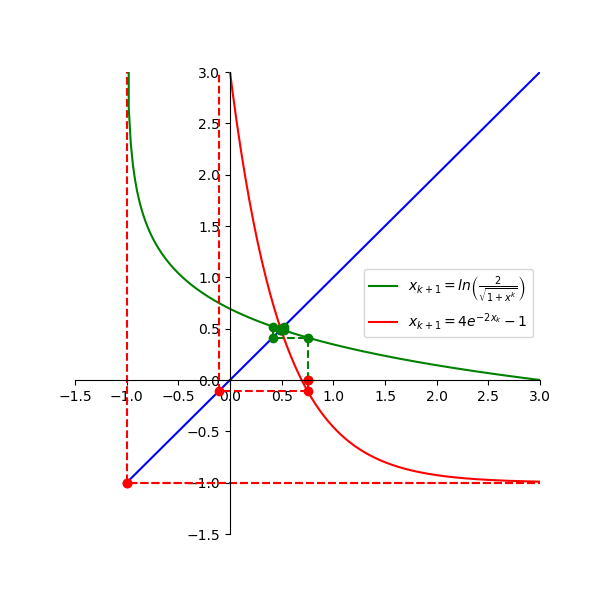

interactive(children=(FloatSlider(value=0.75, description='x0', max=3.0, min=-1.5, step=0.001), Output()), _do…

<function __main__.interact(x0)>

In [6]:
ii = np.linspace(0, 2, 100)
f1 = ln(2/sqrt(1+x))
f2 = 4*exp(-2*x)-1

z = np.linspace(-1, 3, 200)
f1points = [f1.evalf(subs={x: i}) for i in z]
f2points = [f2.evalf(subs={x: i}) for i in z]

# create figure
fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(6)

# some display settings
ax.set_xlim(-1.5, 3)
ax.set_ylim(-1.5, 3)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# plotting
ax.plot(z, f1points, 'g')
ax.plot(z, f2points, 'r')
ax.plot(z, z, 'b')

# define function to visualise convergence
def conv(f, x0, n_it=10):
    # get x and y coordinates
    xx, yy = [x0], [0]
    for i in range(n_it):
        if i % 2 == 0:
            # change y
            # evaluate function
            y = f.evalf(subs={x: xx[i]})

            xx.append(xx[-1])
            yy.append(y)

        else:
            # change x
            xx.append(yy[-1])
            yy.append(yy[-1])
            
    return [xx, yy]

##################################
# # uncomment to plot convergence
# # get convergence
# x0 = 1.5
# f1_conv = conv(f1, x0)
# f2_conv = conv(f2, x0)

# # plot convergence
# ax.plot(f1_conv[0], f1_conv[1], 'go--')
# ax.plot(f2_conv[0], f2_conv[1], 'ro--')
##################################

##################################
# uncomment to interact with convergence
def interact(x0):
        # option 2, remove all lines and collections
    for artist in plt.gca().lines + plt.gca().collections:
        artist.remove()
    
    # plotting
    ax.plot(z, f1points, 'g', label=r"$x_{k+1} = ln\left(\frac{2}{\sqrt{1+x^{k}}}\right)$")
    ax.plot(z, f2points, 'r', label="$x_{k+1} = 4e^{-2x_k}-1$")
    ax.plot(z, z, 'b')
    ax.legend()
    
    # plot convergence
    f1_conv = conv(f1, x0)
    f2_conv = conv(f2, x0)

    # plot convergence
    p1 = ax.plot(f1_conv[0], f1_conv[1], 'go--')
    p2 = ax.plot(f2_conv[0], f2_conv[1], 'ro--')
    
widgets.interact(interact, x0=(-1.5, 3, .001))
##################################


## Question 4

Solve the nonlinear system of equations using Newton's method:

$e^{(xy)} + x^2 +y - 1.2 = 0$

$x^2 + y^2 + x - 0.55 = 0$

Choose as initial values $(x^{(0)}, y^{(0)}) = (0.6, 0.5)$

### Solution

Newton's method for a system of equations $f_1, f_2, f_3, ...$ is given as:

$X_{n+1} = X_n - J^{-1}(X) F(X)$

where $X = (x_0, x_1, x_2, \cdots, x_n), F(X) = (f_0(x_0, x_1, \cdots, x_n), f_1(x_0, x_1, \cdots, x_n), \cdots f_n(x_0, x_1, ..., x_n))$ and 

$\begin{equation*}
J = 
\begin{pmatrix}
\frac{\partial f_0}{x_0} & \frac{\partial f_0}{x_1} & \cdots & \frac{\partial f_0}{x_n} \\
\frac{\partial f_1}{x_0} & \frac{\partial f_1}{x_1} & \cdots & \frac{\partial f_1}{x_n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
\frac{\partial f_n}{x_0} & \frac{\partial f_n}{x_1} & \cdots & \frac{\partial f_n}{x_n} 
\end{pmatrix}
\end{equation*}$

We write our problem as follows,

$f_0 = e^{(xy)} + x^2 +y - 1.2 = 0$

$f_1 = x^2 + y^2 + x - 0.55 = 0$

Therefore, the Jacobian is

$\begin{equation*}
J = 
\begin{pmatrix}
\frac{\partial f_0}{x} & \frac{\partial f_0}{y} \\
\frac{\partial f_1}{x} & \frac{\partial f_1}{y}
\end{pmatrix} = 
\begin{pmatrix}
ye^{xy} + 2x & xe^{xy} + 1 \\
2x + 1 & 2y \\
\end{pmatrix}
\end{equation*}$


##### NOTE: It is important to transform the equation so that the right hand side value equals zero.

$\begin{equation}
\begin{pmatrix}
x_{n+1} \\
y_{n+1}
\end{pmatrix} = 
\begin{pmatrix}
x_{n} \\
y_{n}
\end{pmatrix} - J^{-1}(x_n,y_n)
\begin{pmatrix}
f_0(x_n,y_n) \\
f_1(x_n,y_n)
\end{pmatrix}
\end{equation}$
  
The inverse of the Jacobian is computed to be:

$\begin{equation*}
J^{-1}(x,y) = \frac{1}{2y(ye^{xy} + 2x) - (2x+1)(xe^{xy} + 1)}
\begin{pmatrix}
2y & -xe^{xy} - 1 \\
-2x - 1 & ye^{xy} + 2x \\
\end{pmatrix}
\end{equation*}$

The first step of the iteration is carried out here and the rest of the iteration is analysed using Python

$\begin{equation}\label{eq:matrixeqn}
\begin{pmatrix}
x_{1} \\
y_{1}
\end{pmatrix} = 
\begin{pmatrix}
x_{0} \\
y_{0}
\end{pmatrix} - J^{-1}(x_n,y_n)
\begin{pmatrix}
1.009859 \\
0.66
\end{pmatrix}
\end{equation}$


Jacobian: 
 Matrix([[2*x + y*exp(x*y), x*exp(x*y) + 1], [2*x + 1, 2*y]])

Jacobian inverse:  Matrix([[(2*y*(2*x + y*exp(x*y)) - (-2*x - 1)*(x*exp(x*y) + 1) - (2*x + 1)*(x*exp(x*y) + 1))/((2*x + y*exp(x*y))*(2*y*(2*x + y*exp(x*y)) - (2*x + 1)*(x*exp(x*y) + 1))), -(x*exp(x*y) + 1)/(2*y*(2*x + y*exp(x*y)) - (2*x + 1)*(x*exp(x*y) + 1))], [(-2*x - 1)/(2*y*(2*x + y*exp(x*y)) - (2*x + 1)*(x*exp(x*y) + 1)), (2*x + y*exp(x*y))/(2*y*(2*x + y*exp(x*y)) - (2*x + 1)*(x*exp(x*y) + 1))]])

(x0, y0) = (1.6, 0.5)
(x1, y1) = (0.689165047800501, 0.465506799237895)
(x2, y2) = (0.479348750925101, 0.109123521717608)
(x3, y3) = (0.399979200514379, 0.0377778641862781)
(x4, y4) = (0.393886640633851, 0.0321743970585159)
(x5, y5) = (0.393849454127618, 0.0321427400941236)
(x6, y6) = (0.393849452834869, 0.0321427389437405)



<IPython.core.display.Javascript object>


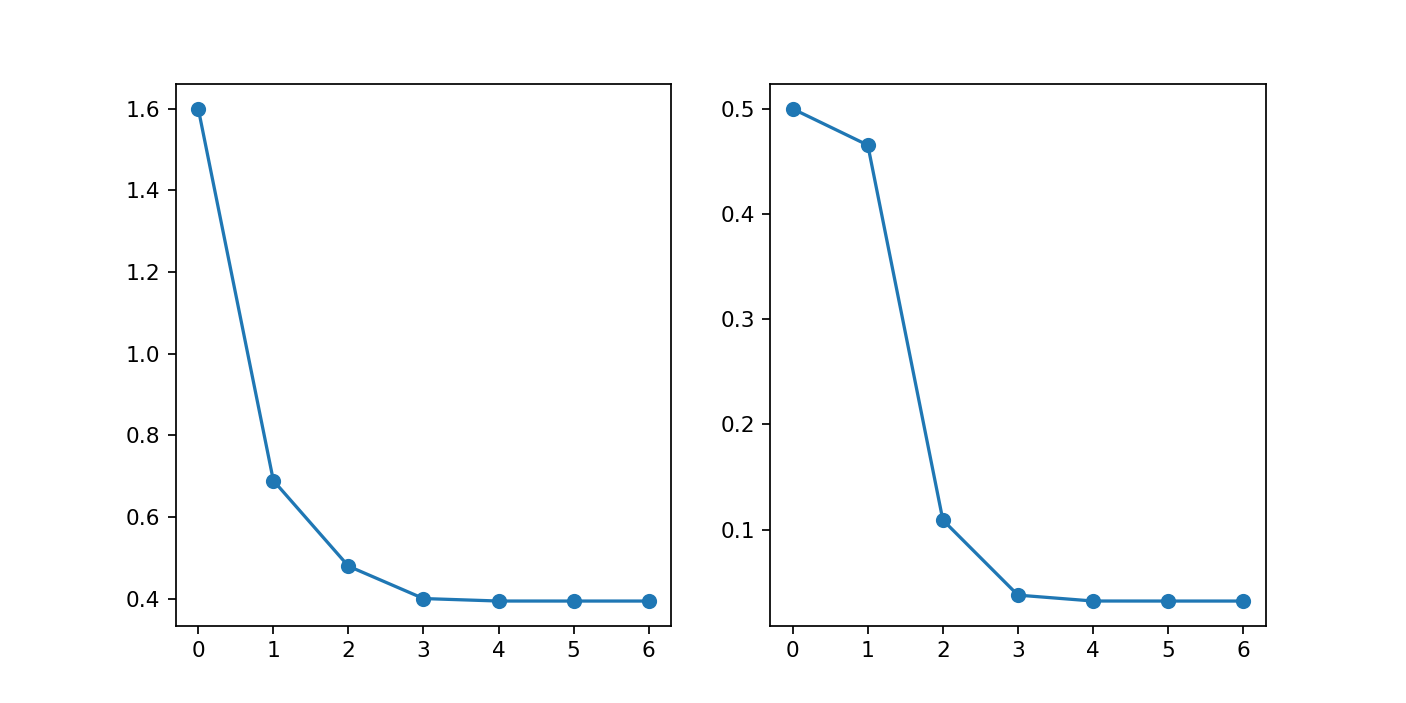

In [8]:

x, y = symbols("x y")
f0 = exp(x*y)+ x**2 + y - 1.2
f1 = x**2 + y**2 + x - 0.55

J = Matrix([[f0.diff(x), f0.diff(y)], [f1.diff(x), f1.diff(y)]])
print("Jacobian: \n", J)
J_inv = J.inv()
print()
print("Jacobian inverse: ", J_inv)

# iterative loop
no_it = 7 # number of iterations
x0, y0 = 1.6, 0.5
X_0 = [x0, y0]
XX = [X_0]
print()
conv = [[], []]
for n in range(no_it):
    x_n, y_n = XX[n][0], XX[n][1]
    conv[0].append(x_n)
    conv[1].append(y_n)
    
    print(f"(x{n}, y{n}) = ({x_n}, {y_n})")
    
    # substitute values into expressions
    FS = [f0.subs([(x, x_n), (y, y_n)]), f1.subs([(x, x_n), (y, y_n)])]
    J_invS = J_inv.subs([(x, x_n), (y, y_n)])
    
    # convert to numpy arrays
    J_invS = np.array(J_invS.tolist())
    FS = np.array(FS)
    
    # newton step
    XX.append(XX[n] - J_invS.dot(FS))

print()
plt.close()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4.5)
fig.set_figwidth(9)

ax1.plot(conv[0], marker='o')
ax2.plot(conv[1], marker='o')


.




.


.